# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\anjal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [5]:
# Load the dataset
data = pd.read_csv('marketing.csv')
# Display the first 5 rows and check shape and info
print(data.head())
print(data.shape)
print(data.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

# Treat missing values if any (example: fill with mean or drop)
data.fillna(data.mean(), inplace=True)

Income    1.071429
dtype: float64


TypeError: Could not convert ['GraduationGraduationGraduationGraduationPhDMasterGraduationPhDPhDPhDGraduationBasicGraduationMasterGraduationPhDGraduationGraduationMaster2n CycleGraduationGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationPhDMasterMasterGraduationPhDMasterMasterPhD2n CycleGraduationPhDGraduationMasterGraduationPhDMasterGraduation2n CycleGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDMasterGraduationGraduationPhDGraduationGraduationGraduation2n CycleGraduationGraduationMaster2n CycleGraduationPhDGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduation2n CycleMasterGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationMasterMasterPhDGraduationGraduationGraduation2n CyclePhD2n CyclePhDGraduationPhDGraduationBasicGraduationGraduationGraduationMasterGraduationPhDMasterGraduationPhDGraduationGraduation2n Cycle2n CycleGraduationMasterMasterMasterGraduationGraduation2n CycleGraduationMasterPhDPhDGraduationMasterGraduationGraduationPhDPhDBasicPhDPhDPhDMasterMasterGraduationPhDGraduationGraduationGraduationGraduation2n CycleMasterMasterGraduation2n CycleGraduationPhDGraduationGraduationGraduationGraduationGraduationMasterPhDGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationPhDPhDPhDGraduation2n CyclePhD2n CycleMasterMasterBasicGraduationPhDGraduationGraduationPhDBasicPhD2n CycleGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationGraduationGraduationPhDPhDMasterGraduationMasterGraduationGraduationGraduationGraduationPhDMasterGraduationGraduation2n CycleMasterMasterGraduation2n CycleGraduationPhDPhDGraduationGraduationGraduationGraduationPhDPhDGraduation2n CycleGraduationGraduationPhD2n CycleMasterPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDMasterMasterGraduationGraduation2n CycleGraduationPhDPhDGraduationGraduationPhDGraduationPhDMasterPhDMasterMasterGraduationPhDGraduationGraduationGraduationMasterPhDGraduationGraduationPhDGraduationMasterPhDMasterBasicGraduationGraduationPhDMasterGraduationGraduationMasterGraduationMaster2n CycleGraduationGraduationGraduationGraduationMaster2n CycleMasterGraduationPhDGraduation2n CyclePhDGraduationGraduationMasterGraduationGraduationMasterMasterGraduationGraduationGraduationMasterGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationGraduationPhDGraduationPhDPhDGraduationPhDPhDMasterGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDPhDBasicGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationPhDGraduationGraduationPhDMasterPhDGraduationPhDGraduationPhDGraduationGraduationGraduationGraduationGraduationPhD2n CycleGraduationMasterGraduationPhDMasterGraduationGraduationPhDGraduationPhDGraduationGraduation2n CycleMasterGraduationMasterGraduationGraduationPhDGraduationMasterGraduationPhDMasterPhDGraduationGraduationGraduation2n Cycle2n CycleGraduationGraduationGraduationPhDGraduationPhDPhDPhDGraduation2n CycleGraduationPhDGraduationGraduationPhD2n CycleGraduationGraduationMasterPhDGraduationMasterMasterPhDGraduationGraduationGraduation2n CycleGraduationPhDGraduation2n CycleGraduationGraduationMasterGraduationMasterPhD2n CycleGraduationPhDGraduationGraduation2n CycleGraduationMasterGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationGraduation2n CycleMasterGraduation2n CycleGraduationGraduationPhDGraduationGraduationPhDPhDGraduationGraduationPhDGraduationGraduationPhDGraduationGraduationGraduationPhDMasterPhDGraduationMasterMasterGraduationGraduationMasterPhDMasterGraduationGraduation2n CyclePhDGraduationGraduationMasterPhDMasterGraduationPhDPhDGraduationGraduationMasterBasicPhDMasterGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterPhDMasterGraduationGraduationGraduationMasterGraduationMasterGraduationGraduationGraduationGraduationPhDMasterGraduationPhD2n CycleGraduationMasterGraduationGraduationMasterGraduationGraduation2n CycleMaster2n CycleGraduationPhDPhDGraduation2n CycleGraduationGraduationGraduationMaster2n CycleGraduationPhDGraduationMasterGraduationPhDGraduation2n CycleGraduationGraduationGraduationMaster2n CyclePhDPhDGraduationMasterGraduationGraduationGraduationPhD2n CyclePhDMasterPhDGraduationGraduationPhDMasterPhDGraduation2n CycleMasterGraduation2n CycleGraduationMasterGraduationGraduationPhDMasterMasterGraduationPhDMasterGraduationMaster2n CycleGraduationGraduationGraduationGraduationPhDMasterMasterGraduationGraduationBasicGraduationMasterMasterBasicGraduationPhDGraduationMasterPhDGraduationMasterPhDGraduationGraduation2n Cycle2n CycleGraduationGraduationGraduationPhDGraduationPhDPhD2n Cycle2n CycleGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDPhDGraduationMasterPhDGraduationMasterMasterGraduationMasterGraduationGraduationPhDGraduationGraduationGraduation2n CyclePhDPhDGraduationGraduationGraduationBasicMasterGraduationPhDBasicPhD2n CyclePhDMasterGraduationGraduationPhDGraduationPhDGraduation2n CyclePhDGraduationGraduation2n CycleGraduationGraduationPhDPhDPhDPhDPhDPhDGraduationMasterBasicMasterMasterGraduationPhDGraduationGraduationGraduationGraduationGraduationMasterMasterGraduationPhDGraduationPhDMasterGraduationMasterGraduationGraduationGraduationPhD2n CycleGraduationGraduationGraduationMasterGraduationPhDGraduationGraduationGraduationGraduationMasterMasterGraduationPhDPhDGraduationPhDGraduationGraduationGraduationMasterBasicGraduationPhDMasterPhD2n CycleGraduationGraduation2n CycleGraduationGraduation2n CyclePhDPhDGraduationGraduationGraduation2n CyclePhDGraduationMasterPhD2n CycleGraduationMasterPhDGraduationGraduationGraduationGraduation2n CycleMasterGraduationPhDGraduationGraduationPhDGraduationPhDPhDMasterGraduationPhDGraduationGraduationGraduationGraduationBasicMasterPhDMasterGraduationMasterPhDGraduationGraduationGraduationMasterPhD2n CycleGraduationGraduationMasterGraduationGraduationPhDGraduationMasterMasterGraduationGraduationGraduationGraduationGraduationGraduationMasterPhDPhDGraduationGraduationGraduation2n CyclePhDGraduationGraduationGraduationGraduation2n CycleGraduationGraduationPhDGraduationPhDGraduationPhD2n CycleGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduationGraduationGraduation2n CycleGraduation2n CycleMasterGraduationGraduationGraduationPhD2n CyclePhDPhDGraduationMasterGraduationGraduation2n CycleGraduationMasterGraduation2n Cycle2n CyclePhDMasterMasterGraduationGraduationPhDGraduationGraduation2n CycleMasterGraduationMasterGraduationMaster2n CycleGraduationGraduationGraduation2n CyclePhDPhDPhDGraduationGraduationMasterGraduationMasterGraduationBasicPhDPhDGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationPhDMasterGraduationGraduationMasterPhD2n CyclePhDPhDGraduationMasterPhDGraduationMasterGraduation2n CycleGraduationPhDPhDGraduationPhDBasicGraduationPhDGraduationPhDGraduationPhD2n CyclePhDGraduationGraduationBasicPhD2n CycleGraduationGraduation2n CyclePhDPhDMasterPhDMasterPhDGraduationGraduationGraduationPhDGraduationPhDMasterPhDGraduationGraduationGraduationGraduationPhDGraduationGraduationPhD2n Cycle2n CycleMasterGraduationMasterMasterGraduationGraduation2n CycleGraduationMasterGraduationGraduationPhDPhDGraduation2n CyclePhDGraduation2n CycleMasterGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhD2n CycleGraduationPhDGraduationMasterGraduationGraduationPhDGraduationPhDGraduationMasterMasterMaster2n CycleGraduationGraduationGraduationGraduationPhDPhDMasterGraduationPhDGraduationBasicPhD2n CycleGraduationGraduationGraduation2n CycleGraduationGraduationPhDMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationMasterMasterPhDGraduationGraduation2n CyclePhDPhD2n CycleMasterGraduationGraduationPhDGraduationGraduationMasterGraduationPhDPhDPhDGraduationGraduation2n CycleGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationPhD2n CycleMasterPhDGraduationGraduationGraduationGraduationMasterGraduationGraduationPhDGraduationPhDPhDPhDGraduationPhDPhDGraduationGraduation2n CycleMasterGraduationGraduation2n CycleGraduationGraduationGraduationPhDPhD2n Cycle2n CycleGraduationGraduation2n CyclePhDMasterPhDGraduationPhDMasterBasic2n CycleGraduationPhDMasterGraduationGraduationGraduationGraduationGraduationBasic2n CycleMasterGraduationGraduationGraduationGraduation2n CyclePhDPhDMasterGraduationMasterGraduation2n CyclePhDGraduationMasterGraduationGraduationPhDGraduationPhDGraduationGraduationGraduationMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduation2n CycleGraduationGraduationGraduationBasic2n CyclePhDMasterBasicMasterMasterGraduationGraduationMasterGraduationGraduationPhDBasicGraduationGraduationGraduationPhDPhD2n CycleMasterMasterGraduationGraduationMasterMaster2n CycleMasterPhD2n CycleGraduationGraduationMasterGraduationMasterMasterPhDGraduationPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationPhDPhDGraduationBasicGraduation2n CycleGraduationPhDPhDPhDGraduationMasterMasterGraduationPhDGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationBasicPhDGraduationMasterPhDGraduationBasicGraduationPhDGraduationPhDGraduationPhDGraduationGraduationPhD2n CycleGraduationGraduationGraduationPhDPhDMasterGraduationGraduationGraduationPhDGraduationPhD2n CycleGraduationMasterGraduationMasterMasterGraduationMasterGraduationGraduationGraduationGraduation2n CyclePhDMasterBasicGraduationPhD2n CycleMasterGraduationGraduationGraduation2n CyclePhDPhDMasterPhDGraduationGraduationGraduationMasterGraduation2n CycleGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDMasterMaster2n Cycle2n CyclePhDGraduation2n CycleGraduationGraduationMasterMasterGraduationGraduationBasicMasterGraduationPhDMasterPhDGraduationGraduationGraduationGraduationMasterGraduationGraduationMasterGraduationGraduationGraduationMasterMasterGraduationBasicGraduation2n CyclePhDGraduationPhDPhDGraduationGraduationGraduationGraduationGraduationGraduationPhDGraduationMasterGraduationBasicGraduation2n Cycle2n CycleMasterGraduationGraduationMasterGraduationGraduation2n CycleMasterPhDPhDGraduationGraduationGraduationMasterMasterMaster2n CycleGraduation2n CycleGraduationGraduationPhD2n CycleGraduationGraduationMasterGraduationPhD2n CyclePhDMasterGraduationGraduationMasterPhDGraduationGraduationGraduationGraduationMasterPhDMasterMasterGraduationPhDPhDGraduationMasterGraduationGraduationGraduationBasicGraduationGraduationGraduationPhD2n CycleGraduationPhDGraduationGraduationPhDPhD2n CycleGraduationMaster2n CycleGraduationGraduationGraduation2n CycleGraduation2n CycleGraduationGraduationGraduationMasterGraduationMasterGraduationGraduation2n CycleGraduationPhD2n CycleGraduationGraduationGraduationPhDPhDGraduationGraduationGraduationGraduationPhDMasterGraduationPhDGraduationMasterMasterGraduationGraduationPhDGraduation2n CycleGraduationGraduationPhDGraduationGraduationMasterPhDMasterPhDGraduationGraduation2n CycleGraduation2n CycleMasterMasterPhDGraduationMasterPhDPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationMasterPhDMasterMaster2n CyclePhDGraduationGraduationMasterGraduationGraduation2n CycleGraduationGraduationGraduationMasterGraduationPhDGraduationGraduationPhDGraduationGraduationPhDGraduationPhDGraduation2n Cycle2n CyclePhDMaster2n Cycle2n CycleGraduationPhDPhDMasterGraduationMasterGraduationPhDGraduationMaster2n CycleGraduationGraduation2n CycleMaster2n CycleGraduationGraduationGraduationMasterMasterGraduationGraduationPhDGraduationMasterGraduationGraduationGraduationGraduationMasterGraduationPhDPhDPhDGraduationMasterMasterGraduationPhDGraduationPhDGraduationMasterGraduationMasterGraduationMasterGraduationPhDMasterGraduationGraduationGraduationPhDGraduationBasicMasterPhDPhDMasterGraduationGraduationPhDMasterMasterMasterGraduationGraduationPhDGraduation2n CycleMasterPhDGraduation2n CycleGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterPhDGraduation2n CycleGraduationGraduationPhDPhDPhDGraduation2n CyclePhDPhDPhDGraduationPhDPhDGraduationGraduationGraduationMasterMasterPhDGraduationBasic2n CycleMasterMasterGraduationGraduationPhDGraduationGraduationGraduationGraduationPhDMasterMasterPhD2n CycleGraduationPhDGraduationGraduationGraduationPhD2n CyclePhDPhDPhDPhDPhDGraduationMaster2n CycleGraduation2n CycleGraduationBasicPhDGraduationGraduationGraduationPhDPhDGraduationGraduationMasterGraduationGraduationGraduationGraduationMasterPhD2n CycleGraduationGraduation2n CyclePhDPhDMasterGraduationMasterGraduationPhDBasicPhDMasterGraduationGraduationPhDGraduationMasterGraduationGraduationBasicGraduationGraduationGraduationGraduationPhDGraduationPhDGraduationPhDPhDMasterGraduationBasicMasterGraduationPhDGraduationGraduationGraduation2n CycleGraduationGraduationGraduationGraduationPhDGraduationGraduationPhDGraduationPhDGraduationBasicMasterGraduationPhDPhDGraduation2n CyclePhDGraduationBasicGraduationMasterPhDGraduation2n Cycle2n CycleGraduationGraduation2n CycleGraduationPhDGraduationBasicMasterPhDPhDGraduationPhDGraduationGraduationGraduationPhDPhD2n CycleBasicPhDGraduationGraduationGraduationGraduationGraduationGraduation2n CycleGraduationGraduationPhD2n CycleGraduationGraduationMasterGraduationMasterGraduation2n CycleGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationPhDGraduationPhDMasterGraduationGraduationPhD2n CycleGraduationGraduationPhDGraduationMasterMasterGraduation2n CycleGraduationPhDGraduationMasterMasterGraduationGraduationPhDGraduationGraduationGraduationPhDGraduation2n CyclePhDPhDMasterMasterMasterMasterPhDPhDGraduationPhDGraduation2n CycleGraduationPhDGraduationPhDMasterMasterMasterPhDGraduationPhD2n CycleGraduationGraduationGraduationGraduationMasterGraduationMaster2n CyclePhDGraduationGraduationPhDGraduation2n CycleMasterGraduationPhDGraduationPhDPhDPhDMasterPhDGraduationPhDPhDGraduationGraduationPhDMasterGraduationGraduationGraduationGraduationBasicPhDPhDPhDPhDGraduationMasterGraduationGraduationGraduationPhDGraduationGraduationMaster2n CycleGraduationMasterGraduationPhDGraduationGraduationPhDGraduationPhD2n Cycle2n CycleGraduationMasterGraduationMasterPhDGraduationGraduationMasterPhDPhDMasterMasterGraduation2n CyclePhDPhDMasterGraduationPhDGraduationGraduationGraduationMasterGraduationGraduationMasterGraduationGraduationPhDGraduationGraduationPhDPhDPhDGraduationGraduationGraduationPhDMasterPhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduation2n CycleGraduation2n CyclePhDGraduationMasterGraduationPhDGraduationMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterMasterGraduationGraduation2n CycleGraduationPhDPhD2n CycleGraduationPhDGraduationGraduationMasterGraduationGraduationGraduationPhDPhDGraduationGraduationGraduationBasicGraduation2n CycleGraduationGraduationGraduationGraduationGraduationMasterGraduationMasterPhDMasterGraduationGraduationMaster2n CyclePhDGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationGraduationMasterGraduationGraduationGraduationGraduationGraduation2n CycleGraduationGraduationGraduationMasterGraduationGraduationGraduationPhDGraduationMasterGraduationPhDPhDGraduationGraduationGraduationGraduationPhDGraduationGraduationGraduationGraduationGraduationPhDGraduationGraduationMasterBasicGraduationMasterGraduationGraduationGraduationGraduationMasterGraduation2n CycleGraduationGraduationMasterMasterBasicGraduationGraduationMasterPhDGraduationGraduationMasterGraduationMasterPhD2n CyclePhDBasicBasicMasterGraduationMasterGraduationGraduationPhDGraduationMasterMasterMaster2n CyclePhDMasterGraduationMaster2n CycleGraduation2n CycleGraduationGraduationGraduationPhDPhDGraduationGraduationMasterPhDBasicMasterGraduationGraduationGraduationMasterMasterGraduationGraduationGraduationGraduationGraduationGraduationPhDMasterPhDPhDMasterGraduationGraduationGraduationMaster2n Cycle2n CycleMasterPhDGraduationPhDGraduationGraduation2n CycleBasicPhDGraduationMasterGraduationGraduationGraduation2n CycleGraduationGraduationGraduationPhDMasterPhDGraduationGraduationGraduationPhDGraduationBasic2n CycleGraduationMasterPhDMasterBasicMasterGraduationGraduation2n CycleGraduationMasterGraduationGraduationGraduationGraduationBasicGraduationPhDGraduationGraduationGraduationGraduationGraduationBasicGraduation2n CycleGraduationMaster2n CycleGraduationGraduationGraduationPhDGraduationMasterGraduationMaster2n CycleMasterPhDGraduationGraduationGraduation2n CycleGraduationGraduationMasterGraduationGraduationGraduationGraduationPhDGraduationMasterPhD'
 'SingleSingleTogetherTogetherMarriedTogetherDivorcedMarriedTogetherTogetherMarriedMarriedDivorcedDivorcedMarriedSingleMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedTogetherSingleMarriedSingleMarriedMarriedDivorcedTogetherTogetherDivorcedMarriedSingleMarriedMarriedWidowDivorcedMarriedMarriedTogetherSingleMarriedSingleMarriedTogetherSingleMarriedWidowMarriedSingleDivorcedMarriedTogetherDivorcedSingleSingleMarriedSingleTogetherSingleWidowTogetherMarriedTogetherSingleTogetherTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleTogetherTogetherSingleMarriedMarriedTogetherDivorcedMarriedMarriedSingleMarriedTogetherMarriedSingleTogetherSingleMarriedMarriedWidowDivorcedMarriedMarriedSingleSingleTogetherMarriedMarriedTogetherMarriedMarriedSingleMarriedTogetherSingleTogetherSingleMarriedSingleMarriedMarriedTogetherTogetherTogetherSingleMarriedDivorcedSingleTogetherSingleMarriedMarriedTogetherMarriedAloneMarriedMarriedMarriedTogetherDivorcedMarriedAloneDivorcedSingleTogetherMarriedSingleTogetherMarriedMarriedTogetherMarriedMarriedMarriedMarriedTogetherAloneTogetherTogetherSingleSingleTogetherSingleSingleMarriedMarriedDivorcedMarriedTogetherDivorcedDivorcedSingleTogetherTogetherMarriedMarriedTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedTogetherTogetherDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleDivorcedSingleDivorcedTogetherSingleSingleTogetherDivorcedMarriedDivorcedTogetherTogetherMarriedTogetherMarriedMarriedSingleMarriedWidowTogetherTogetherMarriedTogetherMarriedDivorcedTogetherTogetherDivorcedMarriedTogetherSingleDivorcedTogetherSingleMarriedMarriedTogetherSingleSingleSingleWidowTogetherSingleMarriedMarriedMarriedMarriedMarriedMarriedTogetherSingleSingleDivorcedTogetherTogetherSingleTogetherSingleSingleSingleDivorcedDivorcedMarriedMarriedTogetherMarriedMarriedMarriedMarriedTogetherSingleSingleTogetherMarriedDivorcedTogetherSingleTogetherSingleDivorcedMarriedTogetherTogetherTogetherMarriedMarriedTogetherTogetherWidowDivorcedTogetherTogetherMarriedTogetherTogetherTogetherDivorcedTogetherSingleDivorcedDivorcedTogetherMarriedSingleTogetherMarriedWidowSingleMarriedTogetherDivorcedMarriedMarriedSingleMarriedTogetherMarriedSingleMarriedSingleMarriedMarriedDivorcedDivorcedSingleMarriedDivorcedMarriedMarriedSingleSingleSingleMarriedMarriedTogetherDivorcedDivorcedMarriedTogetherTogetherSingleDivorcedMarriedTogetherTogetherDivorcedMarriedDivorcedWidowMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedMarriedTogetherMarriedWidowMarriedMarriedMarriedSingleMarriedDivorcedTogetherSingleMarriedMarriedSingleSingleSingleSingleSingleSingleTogetherSingleMarriedMarriedWidowMarriedSingleSingleTogetherTogetherTogetherDivorcedTogetherTogetherSingleMarriedMarriedTogetherMarriedTogetherSingleTogetherDivorcedTogetherSingleTogetherSingleMarriedSingleDivorcedTogetherMarriedSingleMarriedMarriedSingleTogetherMarriedTogetherTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedTogetherMarriedSingleMarriedTogetherMarriedSingleTogetherDivorcedWidowMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedDivorcedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedWidowWidowMarriedMarriedSingleTogetherWidowMarriedTogetherMarriedMarriedTogetherMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedTogetherDivorcedTogetherMarriedMarriedWidowTogetherDivorcedTogetherSingleDivorcedDivorcedDivorcedTogetherTogetherMarriedTogetherTogetherMarriedMarriedTogetherWidowMarriedSingleMarriedDivorcedTogetherSingleMarriedTogetherTogetherSingleMarriedSingleTogetherMarriedDivorcedSingleMarriedMarriedMarriedMarriedTogetherMarriedSingleMarriedWidowSingleTogetherMarriedSingleTogetherTogetherDivorcedTogetherSingleTogetherWidowSingleMarriedTogetherMarriedWidowMarriedMarriedMarriedSingleSingleSingleMarriedMarriedTogetherSingleMarriedMarriedTogetherMarriedSingleTogetherMarriedDivorcedTogetherSingleTogetherSingleTogetherMarriedMarriedSingleTogetherMarriedMarriedMarriedMarriedTogetherTogetherMarriedTogetherTogetherMarriedTogetherTogetherWidowMarriedTogetherTogetherSingleMarriedSingleTogetherMarriedTogetherDivorcedMarriedMarriedTogetherSingleTogetherSingleMarriedTogetherSingleWidowDivorcedMarriedMarriedSingleWidowMarriedMarriedSingleMarriedSingleTogetherWidowMarriedMarriedSingleWidowSingleMarriedMarriedSingleTogetherDivorcedSingleMarriedTogetherMarriedSingleSingleDivorcedSingleMarriedDivorcedMarriedTogetherTogetherDivorcedSingleTogetherMarriedTogetherDivorcedMarriedTogetherSingleTogetherMarriedTogetherDivorcedDivorcedTogetherTogetherTogetherSingleTogetherMarriedWidowMarriedTogetherMarriedTogetherSingleMarriedMarriedMarriedSingleWidowMarriedSingleMarriedMarriedSingleMarriedSingleDivorcedDivorcedTogetherTogetherTogetherDivorcedSingleMarriedTogetherTogetherDivorcedSingleTogetherTogetherWidowMarriedSingleSingleSingleTogetherDivorcedMarriedDivorcedSingleDivorcedMarriedDivorcedDivorcedTogetherMarriedMarriedSingleSingleTogetherTogetherMarriedDivorcedTogetherDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedTogetherDivorcedTogetherMarriedDivorcedDivorcedMarriedMarriedTogetherMarriedTogetherSingleTogetherSingleTogetherMarriedTogetherMarriedSingleSingleMarriedTogetherTogetherWidowMarriedTogetherTogetherTogetherMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedTogetherMarriedMarriedMarriedMarriedSingleMarriedTogetherTogetherSingleTogetherSingleSingleSingleTogetherSingleMarriedTogetherMarriedTogetherDivorcedMarriedDivorcedTogetherMarriedSingleMarriedSingleSingleMarriedDivorcedTogetherMarriedMarriedWidowMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedTogetherTogetherMarriedSingleMarriedMarriedSingleMarriedSingleMarriedTogetherDivorcedMarriedDivorcedWidowTogetherDivorcedSingleTogetherTogetherMarriedMarriedSingleDivorcedSingleSingleTogetherMarriedSingleMarriedMarriedTogetherSingleSingleSingleMarriedSingleMarriedMarriedTogetherMarriedSingleMarriedMarriedTogetherMarriedTogetherTogetherMarriedTogetherSingleTogetherSingleSingleTogetherTogetherTogetherSingleTogetherSingleTogetherTogetherDivorcedMarriedSingleTogetherSingleMarriedDivorcedMarriedSingleTogetherSingleMarriedTogetherSingleMarriedWidowMarriedSingleDivorcedSingleTogetherDivorcedMarriedDivorcedMarriedDivorcedTogetherTogetherTogetherSingleSingleWidowTogetherMarriedSingleTogetherWidowMarriedSingleMarriedTogetherMarriedSingleSingleTogetherSingleSingleMarriedTogetherTogetherMarriedSingleSingleMarriedTogetherSingleSingleMarriedSingleTogetherTogetherMarriedSingleDivorcedSingleTogetherDivorcedTogetherSingleMarriedMarriedDivorcedTogetherDivorcedTogetherTogetherDivorcedSingleTogetherMarriedMarriedSingleMarriedDivorcedDivorcedSingleTogetherMarriedMarriedTogetherMarriedMarriedMarriedTogetherMarriedTogetherMarriedDivorcedTogetherMarriedTogetherMarriedMarriedTogetherWidowDivorcedDivorcedDivorcedMarriedMarriedMarriedMarriedSingleWidowDivorcedMarriedTogetherSingleDivorcedSingleTogetherTogetherMarriedDivorcedWidowSingleMarriedTogetherMarriedSingleMarriedTogetherMarriedSingleTogetherTogetherSingleTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedTogetherTogetherTogetherMarriedMarriedSingleSingleDivorcedTogetherTogetherSingleTogetherMarriedMarriedSingleTogetherSingleMarriedMarriedMarriedMarriedSingleTogetherTogetherSingleMarriedMarriedTogetherMarriedMarriedTogetherMarriedDivorcedMarriedSingleMarriedMarriedSingleTogetherMarriedTogetherSingleDivorcedMarriedMarriedSingleDivorcedDivorcedMarriedTogetherTogetherTogetherMarriedTogetherTogetherMarriedTogetherSingleMarriedSingleMarriedMarriedTogetherSingleMarriedSingleTogetherTogetherSingleMarriedSingleTogetherSingleMarriedSingleDivorcedSingleTogetherMarriedDivorcedMarriedMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleSingleSingleSingleTogetherMarriedMarriedTogetherMarriedSingleMarriedDivorcedSingleMarriedDivorcedSingleTogetherSingleDivorcedMarriedSingleMarriedTogetherSingleTogetherMarriedDivorcedDivorcedMarriedTogetherMarriedDivorcedSingleWidowTogetherTogetherTogetherMarriedSingleWidowTogetherMarriedTogetherMarriedSingleMarriedTogetherMarriedMarriedMarriedTogetherMarriedTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedMarriedMarriedMarriedTogetherMarriedMarriedMarriedDivorcedSingleTogetherMarriedDivorcedSingleSingleSingleMarriedSingleTogetherMarriedDivorcedWidowDivorcedSingleMarriedDivorcedMarriedMarriedMarriedWidowMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedTogetherTogetherTogetherTogetherTogetherTogetherMarriedSingleSingleTogetherTogetherSingleSingleMarriedDivorcedMarriedWidowMarriedSingleMarriedMarriedMarriedDivorcedTogetherDivorcedTogetherTogetherMarriedTogetherTogetherMarriedSingleSingleMarriedSingleTogetherTogetherDivorcedSingleTogetherTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedTogetherDivorcedDivorcedTogetherMarriedSingleDivorcedMarriedTogetherMarriedSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedMarriedDivorcedMarriedTogetherDivorcedMarriedTogetherMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleTogetherTogetherTogetherMarriedSingleTogetherTogetherMarriedDivorcedMarriedTogetherTogetherMarriedMarriedTogetherMarriedSingleTogetherTogetherMarriedSingleTogetherMarriedMarriedTogetherMarriedTogetherTogetherSingleMarriedMarriedMarriedMarriedSingleTogetherMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedWidowSingleTogetherMarriedMarriedMarriedSingleSingleMarriedMarriedTogetherDivorcedTogetherSingleTogetherMarriedMarriedSingleMarriedSingleSingleSingleTogetherMarriedDivorcedTogetherDivorcedSingleSingleMarriedDivorcedMarriedSingleTogetherSingleDivorcedMarriedSingleSingleMarriedTogetherTogetherDivorcedTogetherTogetherSingleMarriedMarriedTogetherTogetherTogetherTogetherMarriedTogetherTogetherSingleMarriedMarriedDivorcedDivorcedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedTogetherMarriedMarriedDivorcedMarriedMarriedMarriedMarriedSingleSingleTogetherTogetherMarriedMarriedTogetherSingleSingleTogetherMarriedMarriedMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleDivorcedMarriedMarriedTogetherMarriedMarriedTogetherMarriedTogetherWidowTogetherMarriedMarriedMarriedTogetherTogetherTogetherMarriedSingleSingleTogetherTogetherDivorcedTogetherSingleMarriedWidowTogetherTogetherTogetherMarriedDivorcedMarriedTogetherMarriedTogetherMarriedMarriedSingleMarriedMarriedTogetherSingleMarriedSingleMarriedSingleTogetherTogetherMarriedTogetherSingleTogetherTogetherMarriedTogetherMarriedDivorcedTogetherTogetherMarriedMarriedDivorcedTogetherTogetherMarriedTogetherDivorcedMarriedMarriedSingleMarriedMarriedTogetherMarriedTogetherMarriedSingleMarriedMarriedTogetherSingleMarriedMarriedMarriedSingleSingleTogetherSingleMarriedSingleMarriedWidowTogetherSingleTogetherMarriedTogetherMarriedSingleMarriedSingleSingleWidowMarriedSingleTogetherTogetherMarriedSingleDivorcedTogetherMarriedSingleWidowMarriedDivorcedMarriedMarriedTogetherMarriedMarriedTogetherDivorcedDivorcedDivorcedMarriedMarriedMarriedDivorcedMarriedSingleSingleTogetherMarriedMarriedSingleMarriedSingleMarriedMarriedTogetherTogetherTogetherMarriedSingleTogetherTogetherDivorcedTogetherDivorcedDivorcedTogetherMarriedMarriedMarriedTogetherMarriedTogetherTogetherSingleSingleTogetherSingleMarriedMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedSingleSingleMarriedMarriedTogetherSingleMarriedMarriedTogetherMarriedTogetherSingleTogetherMarriedWidowDivorcedTogetherTogetherTogetherTogetherMarriedTogetherTogetherMarriedDivorcedMarriedMarriedTogetherTogetherDivorcedTogetherTogetherTogetherDivorcedMarriedSingleDivorcedWidowMarriedSingleWidowTogetherWidowSingleTogetherMarriedTogetherSingleSingleTogetherDivorcedSingleSingleSingleMarriedMarriedMarriedMarriedSingleTogetherMarriedMarriedMarriedTogetherMarriedSingleMarriedMarriedTogetherTogetherMarriedMarriedMarriedMarriedDivorcedTogetherSingleSingleSingleDivorcedMarriedSingleMarriedDivorcedTogetherMarriedDivorcedWidowMarriedMarriedSingleTogetherTogetherMarriedTogetherTogetherMarriedMarriedMarriedMarriedTogetherMarriedSingleTogetherSingleMarriedTogetherMarriedMarriedMarriedSingleWidowSingleSingleTogetherSingleTogetherMarriedTogetherMarriedDivorcedTogetherSingleDivorcedSingleMarriedMarriedMarriedTogetherTogetherSingleTogetherDivorcedMarriedTogetherMarriedDivorcedMarriedTogetherMarriedSingleWidowWidowSingleMarriedSingleMarriedMarriedMarriedDivorcedTogetherMarriedMarriedMarriedSingleTogetherMarriedMarriedDivorcedMarriedSingleTogetherMarriedTogetherSingleMarriedTogetherMarriedSingleSingleMarriedTogetherTogetherSingleMarriedTogetherTogetherTogetherTogetherSingleTogetherSingleTogetherMarriedSingleSingleTogetherTogetherTogetherTogetherTogetherSingleMarriedTogetherSingleSingleMarriedSingleTogetherSingleMarriedTogetherDivorcedTogetherTogetherSingleMarriedTogetherTogetherDivorcedSingleMarriedTogetherMarriedWidowTogetherMarriedTogetherSingleTogetherMarriedTogetherMarriedTogetherMarriedMarriedMarriedDivorcedTogetherWidowDivorcedTogetherTogetherMarriedMarriedMarriedMarriedSingleSingleTogetherMarriedTogetherSingleDivorcedSingleTogetherMarriedTogetherMarriedDivorcedSingleMarriedMarriedWidowTogetherSingleTogetherTogetherDivorcedDivorcedSingleSingleDivorcedSingleWidowMarriedTogetherDivorcedMarriedMarriedDivorcedSingleSingleSingleMarriedDivorcedTogetherMarriedMarriedTogetherMarriedDivorcedSingleDivorcedTogetherSingleSingleTogetherMarriedSingleMarriedDivorcedMarriedMarriedMarriedTogetherMarriedMarriedTogetherSingleTogetherMarriedWidowSingleMarriedSingleSingleTogetherSingleMarriedSingleSingleSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedTogetherSingleWidowMarriedMarriedMarriedTogetherSingleMarriedMarriedWidowMarriedMarriedSingleTogetherSingleMarriedSingleTogetherSingleWidowTogetherSingleSingleWidowMarriedWidowMarriedSingleDivorcedTogetherTogetherTogetherWidowTogetherDivorcedSingleTogetherMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedSingleTogetherMarriedMarriedMarriedMarriedDivorcedMarriedSingleSingleTogetherMarriedMarriedTogetherMarriedSingleSingleDivorcedMarriedSingleSingleMarriedMarriedDivorcedDivorcedTogetherDivorcedSingleTogetherMarriedSingleMarriedMarriedTogetherDivorcedTogetherTogetherMarriedMarriedMarriedMarriedMarriedTogetherDivorcedTogetherTogetherWidowMarriedMarriedTogetherMarriedTogetherMarriedSingleMarriedTogetherSingleSingleMarriedMarriedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleWidowSingleTogetherSingleDivorcedDivorcedMarriedTogetherTogetherSingleTogetherTogetherMarriedWidowMarriedMarriedMarriedTogetherTogetherMarriedMarriedSingleMarriedDivorcedMarriedWidowMarriedTogetherMarriedSingleMarriedMarriedWidowMarriedMarriedMarriedSingleMarriedDivorcedTogetherTogetherAbsurdTogetherMarriedTogetherSingleMarriedMarriedMarriedTogetherMarriedMarriedMarriedMarriedMarriedDivorcedMarriedSingleWidowTogetherTogetherTogetherMarriedTogetherMarriedTogetherSingleDivorcedTogetherTogetherMarriedMarriedTogetherTogetherMarriedMarriedTogetherTogetherDivorcedSingleMarriedMarriedAbsurdMarriedWidowSingleDivorcedDivorcedDivorcedMarriedDivorcedMarriedSingleSingleTogetherTogetherTogetherMarriedMarriedMarriedMarriedWidowTogetherMarriedDivorcedTogetherMarriedSingleMarriedTogetherTogetherWidowSingleSingleDivorcedSingleMarriedSingleSingleDivorcedTogetherMarriedMarriedMarriedDivorcedYOLOMarriedTogetherMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedTogetherMarriedSingleDivorcedMarriedMarriedMarriedSingleSingleTogetherMarriedMarriedSingleSingleYOLOMarriedMarriedSingleMarriedTogetherTogetherDivorcedDivorcedTogetherDivorcedSingleMarriedTogetherTogetherWidowTogetherTogetherMarriedSingleTogetherMarriedSingleTogetherMarriedSingleTogetherMarriedSingleSingleSingleTogetherMarriedMarriedTogetherDivorcedTogetherMarried'
 '4/9/20128/3/201421-08-201310/2/201419-01-20149/9/201313-11-20128/5/20136/6/201313-03-201415-11-201313-11-201215-11-201315-11-201310/10/201224-11-201224-12-201231-08-201228-03-20133/11/20128/8/20126/1/201323-12-201211/1/201418-03-20132/1/201327-05-201320-02-201331-05-201322-11-201322-05-201411/5/201310/10/201229-10-201220-02-201329-08-201331-12-20132/9/201311/2/20141/2/201329-04-201312/3/201324-12-20125/11/20132/10/201328-06-20149/11/201224-05-20131/1/20148/11/201212/5/201411/8/20122/1/20137/6/201412/6/201319-11-20122/4/201328-04-201417-06-20133/3/20144/7/20137/9/201218-02-201311/6/20136/12/201321-05-201311/5/201419-03-201427-09-20138/4/201311/9/201214-09-201217-03-20135/4/201330-04-201419-12-201227-08-201212/10/20124/9/20132/1/201329-08-201223-06-20133/7/201311/5/201325-02-201411/8/201316-07-201328-05-201412/5/201421-01-201419-11-201227-05-201423-11-201323-03-201424-05-201422-05-201422-11-201211/4/20131/12/201320-06-201323-07-201330-03-201420-04-201317-05-20138/5/201410/12/201324-09-20132/2/201319-12-20127/12/20122/11/201310/11/201225-06-20142/1/201312/12/201210/9/201324-01-201419-02-201311/7/201314-11-201320-06-201324-02-20144/9/201322-04-201312/3/201318-02-201321-04-20138/6/201411/7/201310/5/201430-09-201310/3/201310/2/201411/8/201314-08-201317-03-20138/8/20127/7/201319-05-201428-07-201319-10-201214-11-201319-04-201328-08-201319-03-201318-10-201228-10-201228-08-201322-08-201221-06-201424-04-20147/3/201414-12-201212/5/20149/10/201219-02-20138/7/201312/9/201317-10-201320-08-20131/7/20135/11/20125/1/20141/5/20131/3/201413-11-201318-11-201328-08-20132/11/201325-02-201421-04-201413-07-201321-04-201430-01-20144/4/201412/9/201216-12-201223-05-201424-06-20141/12/201311/5/201410/5/201428-09-201322-01-201415-06-20145/12/20128/3/20142/8/201319-03-201323-02-20139/9/201217-05-201326-09-201330-05-201318-02-201329-12-201313-05-201419-09-201317-01-201331-03-201429-06-20149/12/201314-10-20132/11/201217-07-201310/11/20128/12/201313-05-20138/6/201410/9/201231-03-201318-03-20145/10/201221-01-20134/5/20131/4/201412/5/201415-11-201331-08-201314-11-201211/4/201414-11-201314-04-20145/1/20138/9/201226-03-201325-10-20129/12/20128/8/201216-02-201420-03-20135/1/201315-05-201316-04-201423-03-20139/12/20134/12/20134/10/201326-12-201317-05-201428-10-201323-12-201231-07-201328-11-201317-08-20125/6/201420-05-20139/1/201331-08-201229-10-201216-09-201327-10-20135/4/201322-09-201229-08-201213-10-201216-10-201222-10-20124/6/20138/12/201310/10/201222-05-201317-06-201423-11-20123/2/201314-03-201326-06-201415-10-201219-06-20134/10/201322-09-201220-03-20144/2/20146/4/20146/2/201316-09-201317-01-201330-04-20142/4/201321-04-201311/2/201325-10-201231-08-20121/3/201417-04-201412/7/201329-01-20138/1/201312/5/201413-06-20134/7/201327-12-201331-10-201215-01-201412/3/201323-08-20127/3/201313-01-201312/1/201317-03-201416-04-201412/10/20131/3/201413-04-201427-12-201328-03-201318-09-20125/3/201410/9/201327-04-201318-01-201428-10-20133/6/20136/2/201317-12-201311/3/201429-07-201314-08-201216-07-201323-08-201317-01-20131/7/20139/2/20147/2/201311/1/20135/7/20132/7/20137/11/20139/5/201313-02-201316-04-201311/9/20133/4/201310/1/201330-06-201312/9/20126/12/201212/11/20123/3/201326-09-201310/8/20127/12/201323-11-201213-06-201315-08-201310/11/201323-06-201316-06-201425-12-20123/1/201417-12-201310/1/201328-10-201327-10-201222-12-201229-11-201311/5/201312/12/201220-08-20138/10/201328-09-201222-03-201424-02-201423-11-201228-12-201221-08-201217-05-201316-03-201317-11-20121/12/201222-04-201428-10-201229-08-201311/11/201222-06-201318-08-201218-03-201330-12-20122/10/201314-06-20138/1/201314-11-201312/12/201222-08-201230-03-201415-05-201316-10-20135/10/201230-08-20128/5/20133/1/20149/12/20134/5/201418-04-201325-02-20146/10/201315-09-201231-08-201224-12-20129/11/201223-03-201327-09-201215-08-201311/3/201322-10-20139/6/201430-08-201230-05-20146/6/201317-10-201217-11-20129/11/201230-03-201322-08-201223-01-201331-03-201420-11-201314-02-201422-02-20135/3/20136/5/201422-05-20145/6/20144/6/201313-04-20134/12/201324-04-20145/4/20144/5/201425-04-20139/5/201329-10-201223-01-201325-11-20132/2/201421-06-201321-12-20137/9/201322-08-20137/2/20134/7/201320-12-20136/8/201330-12-201217-03-201413-07-20139/10/201329-12-20139/6/201322-12-20132/5/201316-02-201317-10-20131/12/20137/9/201220-08-201215-09-20121/4/201325-05-201425-09-20121/1/201422-09-201328-01-201426-06-201424-02-20143/3/201423-04-201331-10-20126/3/201415-08-201227-03-201310/10/20134/8/20122/1/201318-05-201418-02-20139/5/201423-05-201423-10-201231-10-201230-12-201311/8/201319-08-201230-10-201310/10/201214-09-201214-11-201326-06-201326-01-201428-10-201224-09-20123/12/201222-02-201312/1/201327-11-201313-04-20135/4/201421-04-201322-05-20143/4/20136/8/201215-11-201329-12-201224-08-201221-06-20137/11/20122/12/201319-07-201321-06-201316-12-201225-05-201328-03-201320-10-201317-03-201411/5/201314-04-20133/2/201330-06-201323-08-20131/3/201427-01-20141/3/201416-08-201330-09-20128/9/20124/12/201227-11-20138/6/201412/8/20123/11/201315-02-201318-09-201318-06-201424-04-201317-06-201311/4/201318-01-201415-02-20148/8/201323-12-20137/11/20136/8/201228-11-20127/8/20134/6/20138/3/20147/1/20143/12/201326-01-201429-03-201431-03-20148/4/20147/2/201418-04-20136/11/201312/9/20121/3/20135/4/20133/8/201322-05-20139/9/201316-06-201325-06-201315-01-20145/11/20137/6/20145/12/20127/9/20135/7/20137/12/201212/9/201227-01-201413-09-20131/8/20132/10/201331-01-20131/4/201423-08-201316-09-20139/7/201310/11/201218-03-201320-10-201315-04-20133/4/201418-04-201423-09-201214-09-201317-05-201420-08-201312/10/201212/12/201210/11/201330-01-201411/9/201319-09-201326-10-201219-10-20134/6/201317-08-201221-02-201331-08-201217-09-20139/12/201226-01-201329-12-201211/2/201411/3/201326-10-20127/5/201419-08-201318-07-201311/12/201228-10-20139/11/201226-07-20136/5/20133/6/201318-03-201317-08-201211/7/201314-07-201310/3/201428-12-20133/6/201320-01-20133/6/201321-09-20126/9/201218-12-201219-11-201313-06-201415-01-201415-02-201418-04-201310/3/20144/6/20138/1/201328-09-20126/11/20135/10/201213-05-201430-12-20127/5/201310/3/201318-08-201321-01-201313-12-201323-05-201416-09-201317-02-201427-08-201212/8/201213-04-20143/8/20127/2/20144/1/201422-09-201231-08-201321-10-20137/12/201214-11-201325-12-20137/9/20121/1/201328-12-201216-05-201325-09-20139/5/20137/11/201329-07-20138/11/201312/9/201216-12-20131/12/201222-05-201430-10-20122/1/201416-06-201323-12-201318-10-201330-08-201225-07-201324-10-201319-12-20137/3/201312/9/20124/8/201216-05-201430-09-20134/10/201225-08-201312/7/20132/11/201329-05-201326-07-201326-03-20148/4/20133/11/20139/4/201417-09-201312/3/201411/2/201429-04-201426-12-201310/1/201327-06-201410/4/201321-11-201310/1/201312/7/201321-10-201220-02-201314-05-20137/8/20137/12/201223-09-201211/2/201331-03-201329-03-201419-12-20122/5/201323-05-201413-02-20131/8/20128/6/201423-11-201325-01-201411/10/201315-04-201327-09-20137/8/201212/6/201316-10-20139/10/201329-04-201429-03-20133/6/201418-03-20139/8/201223-03-20136/3/20131/1/20141/8/201325-01-201412/5/20139/12/20139/3/201415-09-201329-01-201431-12-20133/10/201325-12-201328-02-20132/5/20149/2/201311/8/201219-09-201315-03-20136/4/20143/10/201324-04-201428-10-201310/5/201322-05-201427-04-201311/9/20125/9/20121/9/201326-05-20133/7/201312/12/201324-04-201313-04-20138/12/20126/3/201330-08-201326-01-201418-12-201312/9/20135/4/201414-04-201411/5/201419-03-201418-06-201329-10-201215-02-20142/1/201329-05-20148/9/201215-01-20137/11/201219-07-201329-10-20135/4/201320-01-201328-06-201423-10-20122/3/201314-12-201313-12-201326-03-201319-01-20135/11/20136/4/20134/11/201323-03-201421-10-201322-03-20136/4/201316-10-201320-04-201331-05-20144/2/201323-11-201312/5/201412/3/201424-11-201229-03-20141/9/20135/5/20138/8/201315-06-201418-04-201322-05-201316-04-20137/5/201312/1/201311/5/20131/3/201422-11-201310/9/20125/5/20132/10/201314-02-201329-03-201325-04-201323-09-20122/7/201321-03-20145/8/201329-11-201212/5/201410/11/201227-07-201313-01-201429-09-201224-12-201223-10-201310/5/201313-06-201311/1/20146/11/201226-05-201417-03-20141/4/20134/3/201419-02-20134/10/20125/5/201326-01-201415-02-20149/1/20134/10/201217-12-201311/6/201326-03-201324-09-20136/5/201317-10-201228-09-20136/1/201411/6/20144/4/20146/10/201317-09-201330-06-201314-02-20135/4/201417-01-201310/2/201416-10-201223-07-201319-06-201412/9/20122/7/201326-11-201211/12/20131/4/201316-12-20139/2/20138/9/201214-01-201430-04-20141/2/201312/12/20127/8/201323-01-201411/8/201322-10-20136/2/201316-08-201314-07-20134/12/201324-03-20139/4/201421-11-20132/12/20134/1/201410/3/201429-06-20137/11/201325-01-201314-07-20133/12/201211/5/201326-12-20137/8/201317-11-201318-05-201313-04-201417-04-201324-01-20134/5/201418-05-201431-08-201210/2/201430-12-20134/5/201417-11-20138/4/201410/2/201412/8/201222-12-201222-05-201425-05-201424-10-201322-05-201314-07-20139/8/201310/6/201320-07-201328-05-20134/3/201322-12-20121/10/201216-02-201430-09-20136/12/20131/10/201210/5/20148/5/201429-01-201311/5/201311/5/201410/2/20131/12/201217-08-20127/5/201427-04-201321-09-20127/5/201430-12-201214-10-201325-06-201412/9/201319-08-201312/10/201213-04-201313-10-20122/2/201417-01-201312/11/201217-11-201314-10-20123/2/20141/8/201211/10/20133/1/201412/9/201312/7/201322-06-20147/8/201314-10-201315-08-201321-08-201325-11-201325-10-201312/5/201329-06-201421-03-201429-11-201231-08-201218-02-201422-06-201426-03-20149/11/201325-02-201413-08-20133/11/201310/9/20129/10/201327-03-201313-02-201317-05-20132/2/20135/11/201212/5/201326-01-201410/5/201325-08-201211/1/20147/3/201310/9/201218-04-201419-04-20147/4/201428-05-20133/1/201320-02-201319-06-20147/7/20134/3/201324-06-20143/11/20128/4/201321-08-201329-01-20131/8/20134/11/201229-06-201317-01-201325-06-201422-01-201312/5/201429-08-201226-02-201418-09-201330-03-201429-05-201323-04-20143/11/201218-09-201223-05-201430-07-201313-10-201225-09-201313-10-201313-11-20125/7/20137/4/20145/6/201416-02-201314-02-20135/4/20135/10/201229-08-20129/8/201327-11-201231-03-20131/10/201225-07-201310/1/201319-05-201411/4/201412/9/20121/5/20143/8/20124/8/20124/3/201425-05-20143/12/201230-11-201224-02-201418-07-20133/7/20131/5/201320-08-201322-01-201422-04-201317-03-201417-11-201222-08-201217-08-20132/2/20134/2/201312/10/20134/1/20133/5/201417-03-201429-05-201426-04-201423-08-201322-06-201312/3/20147/8/20132/6/201431-10-201223-04-20132/1/20138/10/201320-05-20132/8/201326-10-201324-03-201415-11-201319-06-20143/8/201330-01-201431-05-201425-02-20131/3/20139/2/201417-02-201430-08-201328-08-201316-10-201320-09-201316-01-201312/9/20136/10/201322-11-201217-05-201324-12-201318-11-201218-12-20128/8/201224-04-201412/1/201320-12-201315-01-201310/10/20137/6/201412/11/201229-10-201324-05-20145/8/20123/5/201322-05-20142/2/201320-06-201331-01-201311/5/201417-08-20135/11/201321-01-201419-11-201314-09-201212/11/201313-10-20126/7/201329-08-201229-08-201222-09-20123/4/201428-05-201421-07-20135/12/201229-05-201411/3/201323-03-201414-09-201220-10-201222-08-201213-10-201323-05-20135/7/201322-08-201229-05-201322-01-201417-02-201417-03-201426-08-201212/1/20148/1/201313-11-20133/11/201217-05-201313-04-201313-02-201413-01-20135/1/201319-01-20133/5/20138/5/20142/8/201322-08-201325-08-20136/12/201227-02-201422-12-201217-11-201220-04-201417-02-201422-04-201321-04-20131/9/201331-03-20135/4/20149/9/201211/9/201325-01-201331-12-201310/10/201217-08-201320-02-201322-11-201329-10-201316-02-201422-05-201312/10/201315-04-201327-10-201312/3/201331-10-201228-06-201317-07-20138/8/20126/10/201319-01-201322-08-201222-09-201326-01-201330-07-201322-09-201328-04-201312/10/201322-10-201215-08-201330-03-201415-02-201329-06-20139/2/201421-03-20132/5/201426-05-201417-04-20144/10/20134/7/201329-11-201318-01-20143/10/201324-05-201420-04-20144/8/201218-05-20143/12/20125/4/201324-03-201424-05-201427-08-201316-07-201322-02-201312/9/201318-10-201330-07-20123/8/201212/5/201419-03-201416-08-201319-05-201422-05-20135/12/20136/7/20136/3/20148/10/201324-09-20128/2/201320-08-201321-06-20147/4/201422-01-201326-08-201219-03-201321-11-201226-02-201316-12-20131/1/201321-09-201229-11-20139/8/201218-08-201220-09-201221-07-20135/11/201214-03-201323-11-20128/6/201310/2/201330-12-20125/9/201331-07-201318-03-20147/12/201312/4/201429-03-201425-10-201324-06-201319-02-201427-12-20124/6/20134/3/201318-02-201425-02-20131/11/201228-06-20133/4/201323-05-201414-01-201422-07-201331-01-201423-11-201226-08-20136/11/201311/1/201420-04-20131/10/201310/6/201429-07-20131/2/201422-04-20136/6/20137/1/20143/9/201229-03-201414-02-201318-04-201425-09-201312/12/201317-11-20137/3/201412/12/201218-09-201329-07-201318-08-201217-09-20138/5/201320-04-201416-10-20138/8/201229-05-201421-11-20121/10/201216-02-201320-03-201320-02-201310/2/201320-06-201331-08-20133/5/201330-03-201321-10-20138/11/201227-01-20149/11/201217-03-201322-04-201328-04-201429-12-20134/10/201326-09-201223-11-201330-05-201331-07-201225-07-20134/9/20127/11/201325-11-201326-12-201313-05-201429-04-201425-12-20136/5/20134/10/20123/3/20132/12/201230-12-201320-08-201325-06-20131/4/20135/5/20143/7/20133/9/201212/1/20146/10/201215-01-20142/3/201420-08-201316-12-20122/5/201411/10/20133/10/20132/3/20149/11/201215-05-201430-07-201322-05-20147/2/201421-04-201310/12/201225-08-201229-03-201421-04-201413-08-201212/10/20127/8/201211/4/201317-12-20138/9/20126/9/201228-09-201220-05-201318-02-201422-01-201413-02-201310/6/201316-01-201323-02-201416-03-201428-01-201411/4/201413-10-201311/11/201216-02-201428-12-20124/5/201313-04-201316-09-201330-03-20144/3/20135/4/201313-02-201419-12-201323-12-201330-10-20134/5/201325-08-201225-01-201323-04-201414-02-201318-07-201321-09-20133/9/201224-10-201227-09-201315-10-201316-12-20121/12/201225-10-201323-03-201417-02-20139/6/201413-11-201330-09-201328-08-201225-06-201413-10-201212/1/201312/2/201414-09-201226-01-201419-08-201313-04-201418-06-20148/7/201320-06-201313-02-201312/5/20138/2/201416-01-201321-12-20132/5/201327-04-20131/9/201216-11-201212/2/201323-11-20122/11/201328-10-201324-01-20141/4/201331-08-201216-10-201322-08-20132/8/20123/3/201322-06-201410/6/201411/1/201310/11/201324-06-201321-01-201327-07-20131/10/201311/12/201326-01-20141/12/201316-08-201213-11-201213-01-201311/2/201313-02-201417-08-20125/11/201220-08-201220-03-20149/7/20137/11/201225-10-20138/6/20132/2/201418-08-201225-11-201227-04-201430-04-201311/3/201428-11-20129/9/201320-09-201311/11/20123/6/201326-05-20137/2/20146/5/201413-04-201320-11-20125/4/201411/12/201224-02-201424-03-201311/12/201215-05-201314-06-201418-08-20124/9/20125/10/201220-12-20137/12/201316-10-201212/1/201328-03-20148/3/201329-11-201226-05-201331-08-201213-01-20132/9/20139/11/201220-01-201329-03-201312/10/20138/3/20142/9/201223-05-201412/8/201215-09-201328-10-201214-06-201323-01-201321-07-201314-02-20134/11/20131/11/201218-06-201416-06-201419-01-20132/12/201215-04-201427-09-201227-03-201324-11-20123/11/201213-02-201428-10-201317-08-201229-03-201323-03-201428-04-201421-06-201323-01-201323-01-201411/12/20132/12/201323-04-201425-02-201419-05-201419-08-201227-06-201410/4/201324-12-20136/12/201214-02-201331-08-201226-08-20135/4/201418-10-201215-02-201415-10-201328-09-201225-04-201427-06-201326-09-20121/6/201330-08-20132/3/201427-07-201316-01-201330-03-20139/3/201411/4/201410/8/20124/12/201217-08-20139/8/201329-12-20135/10/201327-10-201318-05-201427-01-20148/11/201220-08-201312/1/201325-09-201216-01-201323-01-20133/3/20148/9/201217-03-201322-02-201425-10-201331-08-201321-10-201324-03-201419-06-20138/10/201312/4/201317-06-20132/10/201319-06-201427-06-201323-03-201423-09-201327-10-201210/12/20132/5/201410/5/201312/12/201316-06-201418-05-20137/5/201426-02-201420-08-20127/9/201229-04-201322-07-20138/3/201428-05-20132/2/201424-07-201323-06-20142/5/201315-05-201329-05-201410/1/201411/9/201319-06-201320-08-201329-12-201319-11-201322-02-201330-07-20135/9/201311/1/20133/6/201322-11-201228-11-201225-03-201327-06-201312/2/201323-01-20148/10/201317-01-20143/11/20124/6/201425-10-201325-03-20148/8/201223-07-20134/1/201319-07-201319-07-20136/7/201319-02-201327-08-201231-12-201223-05-201319-09-201227-02-201322-09-20125/3/201431-08-201230-03-201420-11-201321-03-20142/10/201223-09-201320-09-201216-08-20122/1/20141/3/201417-06-201428-08-20139/4/201310/11/201229-05-201413-11-201220-05-20138/5/20145/9/201325-11-201213-01-20131/5/201314-12-20132/4/201428-01-201418-04-201429-10-20127/1/20138/3/201317-02-201323-03-201428-12-201227-04-201312/3/20146/5/201318-02-201324-04-201426-11-201324-05-201411/12/201324-04-201418-04-201328-05-201416-01-201320-01-201326-10-201220-11-201228-09-201329-05-20133/3/201316-10-201212/9/201227-02-201412/2/201325-12-201217-03-20136/11/20134/8/201310/5/201426-05-201310/9/201310/3/201323-10-201320-08-20137/9/201326-03-201316-06-20148/5/201315-06-201420-10-201318-09-201218-04-20135/10/20128/6/201318-03-201429-10-201229-08-201213-10-20126/8/20131/8/201317-12-201217-02-201414-10-201228-11-20131/1/20133/11/201221-09-20129/12/201328-08-20122/11/20135/8/201312/4/201415-08-20137/2/201413-07-201314-06-20133/10/201316-04-20146/6/20142/5/201427-06-201414-10-201228-04-201320-03-201310/1/20148/6/20137/12/20134/6/201328-04-20145/11/20124/10/201216-11-201228-06-201420-01-201314-02-201321-07-201328-09-201319-07-201331-08-201315-06-20147/4/201411/10/20134/10/20139/8/20134/9/201215-09-201325-08-201315-02-201323-05-201322-05-20138/10/201315-03-201317-02-201320-03-201411/9/201310/12/20129/9/201322-03-20133/8/201222-09-201211/2/20133/6/201323-04-201431-08-20137/12/201312/9/201223-06-20148/7/201311/1/20142/2/201418-09-201219-05-201329-10-201211/1/201310/9/201312/8/201317-11-20124/7/201326-01-201318-09-20127/11/201215-12-20137/8/201314-10-20139/11/20127/10/20126/9/201311/5/20141/10/201210/3/20141/3/201412/6/201316-04-20142/1/201319-04-20147/2/201416-08-201221-01-201419-02-201315-07-201315-10-201230-04-201418-04-201419-05-201319-05-20143/11/201219-01-20147/11/20139/9/201326-02-201331-08-20122/5/201427-01-20133/6/201426-05-201420-10-20139/9/201231-03-201428-05-201413-06-201323-02-201313-04-201418-03-201424-10-201325-01-201411/5/20136/9/20135/2/201419-03-201326-09-201320-04-201410/11/201214-10-201222-08-201225-01-201324-08-201216-02-201331-05-201320-02-201326-12-201222-06-201419-01-201420-10-20121/10/20138/1/20135/9/201323-11-201223-06-201313-11-201217-06-201320-11-201328-09-20137/1/20141/4/20148/4/20136/9/201210/3/201319-11-201223-03-201431-08-20136/2/201414-01-20137/8/201225-04-201414-09-20126/2/20132/11/201220-06-201431-03-201312/2/20138/7/201318-09-201312/5/201413-08-201223-11-20133/5/201417-01-201422-10-201223-04-20137/5/20143/7/20139/7/201317-06-20146/5/20135/1/201424-08-201322-10-201328-02-201427-02-201323-01-201414-02-201325-03-20141/1/20137/4/20137/11/20135/10/20132/8/201220-09-201310/4/20145/12/201227-02-201318-09-201212/2/201410/6/201312/2/201324-12-20126/2/201322-06-201321-10-201313-04-201416-12-201328-03-201317-10-20133/4/201417-04-201323-05-201429-08-201225-12-201216-01-20132/1/20148/3/201324-12-20136/9/201212/6/201418-09-20137/11/201326-11-201213-02-201317-09-20132/3/201420-05-201314-02-20136/8/201327-01-20137/8/201229-03-20131/3/201315-04-201330-03-201425-09-201212/2/20145/4/201321-01-20145/2/201416-02-201323-02-201412/3/201317-10-20137/9/20121/8/201210/3/201326-11-201312/11/201329-04-201328-09-20135/12/20134/10/20121/6/201328-03-20138/2/20132/5/201325-09-201229-11-20131/12/201311/9/201230-11-20139/6/201411/9/201317-08-201227-12-20139/3/201322-09-201322-06-20142/6/201426-06-201419-03-20136/10/201221-07-20135/1/201318-05-201327-12-201331-05-201325-10-201312/1/201312/8/20126/1/20136/9/201329-10-20125/4/201419-10-20135/8/201325-12-201315-09-201310/1/20137/7/20137/2/20145/7/201327-03-20143/3/201323-06-201326-08-201218-10-20137/11/201213-01-201330-10-201316-02-201315-12-201231-03-20144/10/20136/11/201331-08-201321-10-20132/5/201419-12-20127/9/201221-05-201330-09-201328-05-201329-09-201229-11-201220-03-201422-05-201417-09-201219-02-201428-02-201329-10-201210/6/201315-12-20128/6/201317-09-20122/6/201321-12-201216-05-20141/11/201324-07-20134/12/201326-08-201321-01-201410/4/201318-10-201212/9/201210/8/201330-08-20123/8/201220-06-20144/10/20132/8/201330-03-20133/9/20123/11/201322-04-201311/3/201329-08-201314-08-201210/1/20146/4/20142/10/201311/5/20141/3/20146/8/201230-01-201423-01-20141/2/201328-02-201417-01-201423-11-201325-03-201424-03-20146/7/201312/10/201315-12-201317-09-201228-01-20142/10/201327-06-201312/5/201429-04-201422-01-201412/3/201425-01-201411/10/20124/3/20141/8/20133/6/201328-10-201324-06-201314-02-201327-03-201323-12-201323-11-20135/3/201428-06-201317-01-201429-07-201310/3/201411/1/201322-12-201218-10-20127/1/201324-10-20134/11/20137/3/201323-04-201420-05-201318-03-201410/1/20136/2/201411/5/201410/1/201416-03-201425-02-201321-02-20132/8/20126/11/20121/8/201222-03-201321-04-201421-08-201318-06-201326-06-20145/8/201323-11-201218-10-20122/1/201316-02-201315-10-201211/8/201223-03-20147/12/201215-07-201313-02-20135/2/20141/5/201412/10/201230-07-201320-12-201221-03-20135/4/201419-06-201314-10-201226-11-20134/7/20137/5/201325-06-20149/1/201426-09-201224-03-20133/3/201312/8/201218-05-201416-03-201321-08-201217-08-20122/6/20131/7/201313-06-201310/6/201425-01-201424-01-201415-10-2012'] to numeric

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicate records: {duplicates}')

# Drop duplicates if any
data.drop_duplicates(inplace=True)

Duplicate records: 0


### 5. Drop the columns which you think redundant for the analysis 

In [8]:
# Drop columns that are not needed for analysis (example)
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [9]:
# Group categories in 'Marital_Status'
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 'Relationship', 'Together': 'Relationship',
                                                           'Divorced': 'Single', 'Widow': 'Single',
                                                           'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [10]:
data['Total_Expenses'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                 'MntFishProducts', 'MntSweetProducts', 
                                 'MntGoldProds']].sum(axis=1)

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [11]:
data['Num_Total_Purchases'] = data[['NumWebPurchases', 
                                      'NumCatalogPurchases', 
                                      'NumStorePurchases', 
                                      'NumDealsPurchases']].sum(axis=1)

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [12]:
data['Kids'] = data[['Kidhome', 'Teenhome']].sum(axis=1)

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [13]:
data['TotalAcceptedCmp'] = data[['AcceptedCmp1', 'AcceptedCmp2', 
                                  'AcceptedCmp3', 'AcceptedCmp4', 
                                  'AcceptedCmp5', 'Response']].sum(axis=1)

### 11. Drop those columns which we have used above for obtaining new features

In [14]:
data.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts', 
           'MntGoldProds', 'NumWebPurchases', 
           'NumCatalogPurchases', 'NumStorePurchases',
           'NumDealsPurchases', 'Kidhome', 
           'Teenhome', 'AcceptedCmp1', 
           'AcceptedCmp2', 'AcceptedCmp3',
           'AcceptedCmp4', 'AcceptedCmp5'], axis=1, inplace=True)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [15]:
data['Age'] = 2024 - data['Year_Birth']
data.drop('Year_Birth', axis=1, inplace=True)

### 13. Encode the categorical variables in the dataset

In [16]:
# One-hot encode categorical variables using pd.get_dummies()
data = pd.get_dummies(data, drop_first=True)

### 14. Standardize the columns, so that values are in a particular range

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

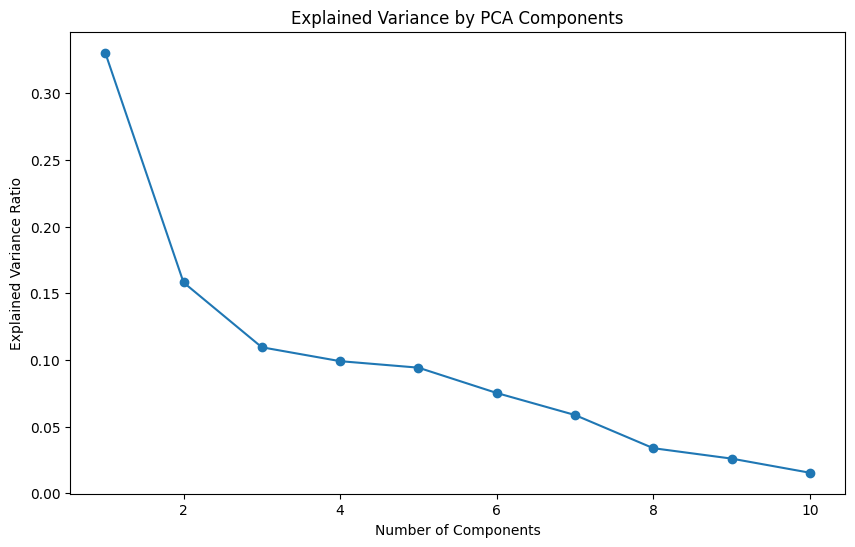

Number of components for 95% variance: 8


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame loaded from the CSV file

# Step 1: Handle missing values only for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Step 2: Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])  # Use only numeric columns

# Step 3: Fit PCA on scaled data
pca = PCA()
pca.fit(scaled_data)

# Step 4: Plotting to visualize explained variance ratio to choose components.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Step 5: Determine number of components for 90-95% variance explained.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # For 95%
print(f'Number of components for 95% variance: {n_components}')

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [23]:
kmeans = KMeans(n_clusters=5) # Choose number of clusters based on elbow method or silhouette score.
clusters_kmeans = kmeans.fit_predict(pca.transform(scaled_data)[:, :n_components])
data['KMeans_Cluster'] = clusters_kmeans

# Evaluate clustering performance using silhouette score.
silhouette_avg = silhouette_score(pca.transform(scaled_data)[:, :n_components], clusters_kmeans)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

Silhouette Score for KMeans: 0.23019837713629068


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

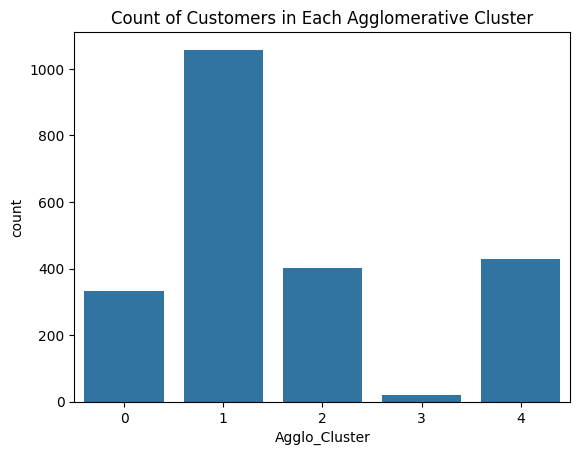

In [24]:
agglo = AgglomerativeClustering(n_clusters=5) # Choose number of clusters.
clusters_agglo = agglo.fit_predict(scaled_data)
data['Agglo_Cluster'] = clusters_agglo

# Perform bivariate analysis and write observations.
sns.countplot(x='Agglo_Cluster', data=data)
plt.title('Count of Customers in Each Agglomerative Cluster')
plt.show()

### Visualization and Interpretation of results

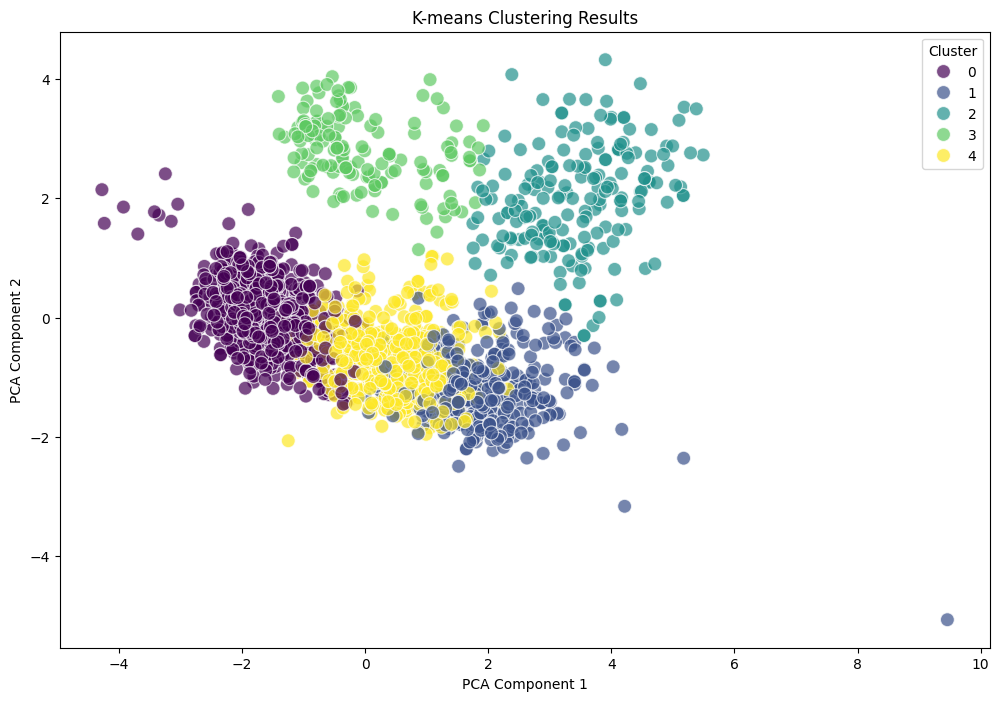

In [25]:
# Visualizing K-means clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca.transform(scaled_data)[:, 0], 
                y=pca.transform(scaled_data)[:, 1], 
                hue=data['KMeans_Cluster'], 
                palette='viridis', 
                alpha=0.7, 
                s=100)
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

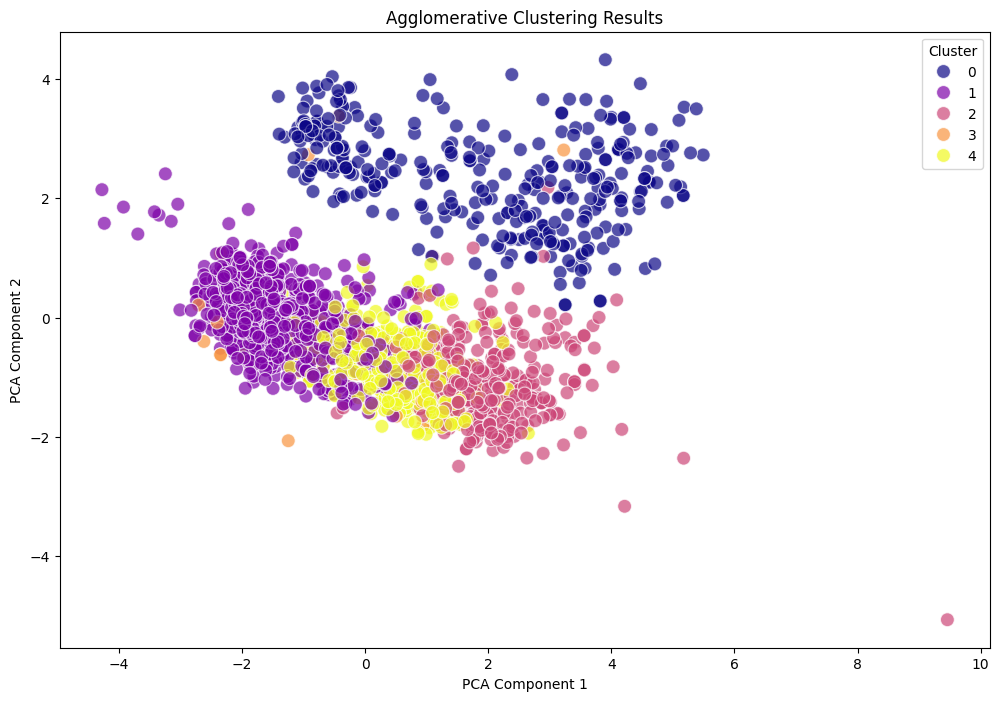

In [26]:
# Visualizing Agglomerative clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca.transform(scaled_data)[:, 0], 
                y=pca.transform(scaled_data)[:, 1], 
                hue=data['Agglo_Cluster'], 
                palette='plasma', 
                alpha=0.7, 
                s=100)
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [27]:
# Analyzing cluster profiles by calculating mean values for each cluster
kmeans_profile = data.groupby('KMeans_Cluster').mean()
agglo_profile = data.groupby('Agglo_Cluster').mean()

print("K-means Cluster Profiles:")
print(kmeans_profile)

print("\nAgglomerative Clustering Profiles:")
print(agglo_profile)

K-means Cluster Profiles:
                      Income    Recency  NumWebVisitsMonth  Complain  \
KMeans_Cluster                                                         
0               34789.757879  51.798742           6.443396  0.010482   
1               77890.275904  55.534060           2.160763  0.005450   
2               78114.095059  41.750000           3.578125  0.005208   
3               38379.577181  27.953020           7.362416  0.013423   
4               59761.625447  48.489619           5.510381  0.010381   

                Response  Total_Expenses  Num_Total_Purchases      Kids  \
KMeans_Cluster                                                            
0               0.000000      102.164570             8.015723  1.247379   
1               0.000000     1257.882834            19.697548  0.128065   
2               0.958333     1555.562500            21.135417  0.187500   
3               1.000000      296.697987            13.402685  1.208054   
4               0.0

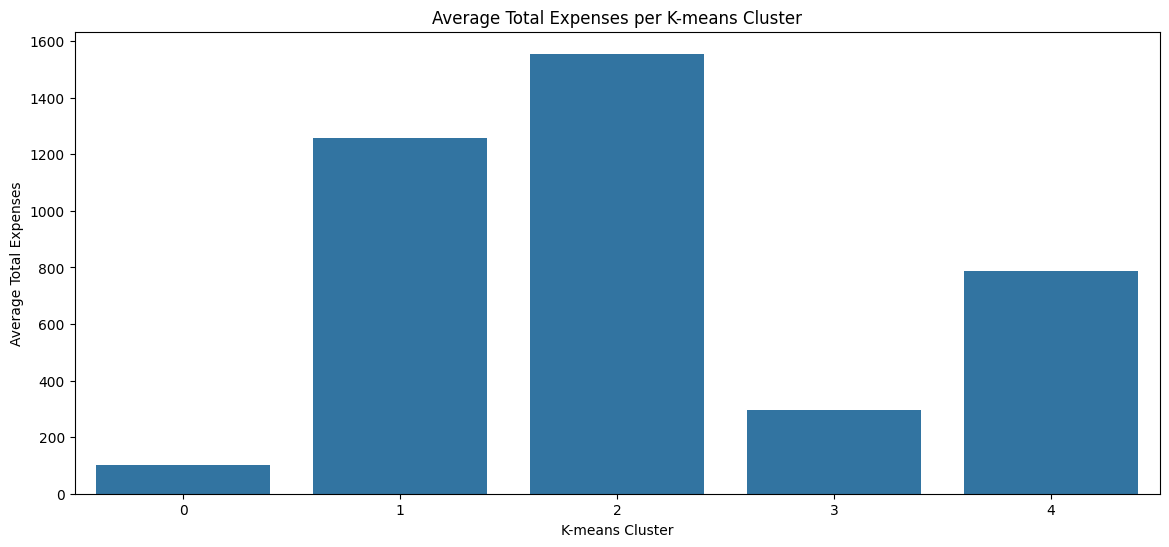

In [28]:
# Bar plots to visualize specific characteristics of each cluster
plt.figure(figsize=(14, 6))
sns.barplot(x=kmeans_profile.index, y=kmeans_profile['Total_Expenses'])
plt.title('Average Total Expenses per K-means Cluster')
plt.xlabel('K-means Cluster')
plt.ylabel('Average Total Expenses')
plt.show()

-----
## Happy Learning
-----